## Data Analysis with pandas

We are going to examine data from the [Bangalore Open Data Repository](https://github.com/openbangalore/bangalore). Bangalore is the 3rd most populous city in India and widely regarded as the Silicon Valley of India.

In [56]:
# load libraries and set styles, options
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib; matplotlib.style.use('ggplot')

from pandas import set_option
set_option("display.max_rows", 16)

LARGE_FIGSIZE = (12, 8)

In [57]:
# inline plots
%matplotlib inline

### Task 1 - Load Data

- Read in the data to pandas
- Check the shape of the dataframe
- Check the summary statistics of the dataframe
- Change the row index to the "Year" column

In [58]:
# read csv dataset and load into pandas dataframe object "year_mon_temp_DF"
year_mon_temp_DF = pd.read_csv('bangalore_temparature.tsv', sep='\t')

In [59]:
# check first few lines
year_mon_temp_DF.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1901,23.094,24.243,25.398,27.740,26.328,24.735,23.969,24.154,25.097,24.301,23.090,21.000
1,1902,21.588,22.930,26.277,27.442,27.118,25.477,24.428,25.019,23.940,23.759,22.790,22.184
2,1903,22.296,23.969,26.552,27.764,26.718,25.132,24.004,23.958,23.925,23.587,21.693,20.727
3,1904,20.982,22.623,25.636,27.510,25.878,23.714,23.278,24.032,24.408,24.185,22.214,21.119
4,1905,21.740,24.158,26.095,26.977,26.863,25.271,24.453,24.444,24.476,24.007,23.029,21.372


In [60]:
# verify data frame shape
year_mon_temp_DF.shape

(102, 13)

In [61]:
# review dataframe info
year_mon_temp_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 13 columns):
Year    102 non-null int64
Jan     102 non-null float64
Feb     102 non-null float64
Mar     102 non-null float64
Apr     102 non-null float64
May     102 non-null float64
Jun     102 non-null float64
Jul     102 non-null float64
Aug     102 non-null float64
Sep     102 non-null float64
Oct     102 non-null float64
Nov     102 non-null float64
Dec     102 non-null float64
dtypes: float64(12), int64(1)
memory usage: 10.4 KB


In [62]:
# set dataframe row index to Year
year_mon_temp_DF = year_mon_temp_DF.set_index('Year')

In [63]:
year_mon_temp_DF.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1901,23.094,24.243,25.398,27.740,26.328,24.735,23.969,24.154,25.097,24.301,23.090,21.000
1902,21.588,22.930,26.277,27.442,27.118,25.477,24.428,25.019,23.940,23.759,22.790,22.184
1903,22.296,23.969,26.552,27.764,26.718,25.132,24.004,23.958,23.925,23.587,21.693,20.727
1904,20.982,22.623,25.636,27.510,25.878,23.714,23.278,24.032,24.408,24.185,22.214,21.119
1905,21.740,24.158,26.095,26.977,26.863,25.271,24.453,24.444,24.476,24.007,23.029,21.372


### Task 2 - Initial Data Analysis

- (Chart) How does temperature vary over the year (X-axis is months)?
- (Chart) How does temperature vary over the years (X-axis is years)?
- Which months had the highest and lowest temperatures in 1960?
- What were the highest, lowest and mean values in 1960?
- Where were the highest, lowest and mean values in an arbitray year (hint: write a function)?
- Which months had the highest and lowest gains in temperature?
- Make a histogram, KDE plot and bar plot of the gains.

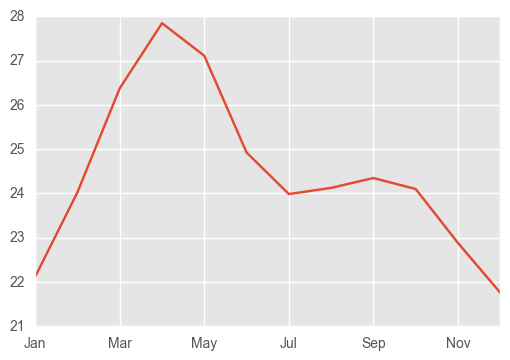

In [64]:
year_mon_temp_DF.mean().plot()

In [65]:
temps_DF = year_mon_temp_DF.T
temps_DF.head()

Year,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
Jan,23.094,21.588,22.296,20.982,21.740,22.935,21.529,21.974,22.070,22.083,...,22.218,22.504,22.372,22.982,22.614,23.530,22.705,23.174,23.196,23.349
Feb,24.243,22.930,23.969,22.623,24.158,24.680,23.739,23.289,23.860,23.578,...,24.155,24.586,24.975,24.345,24.661,25.724,24.466,25.028,26.063,24.130
Mar,25.398,26.277,26.552,25.636,26.095,25.505,25.841,25.262,26.425,26.377,...,26.692,26.980,26.471,27.077,26.584,27.917,27.490,26.542,27.427,27.284
Apr,27.740,27.442,27.764,27.510,26.977,28.822,26.807,28.201,27.133,28.064,...,28.203,27.738,28.069,27.685,26.850,28.908,27.890,28.090,28.128,28.559
May,26.328,27.118,26.718,25.878,26.863,28.272,26.550,26.575,26.177,27.479,...,27.816,27.685,26.253,28.268,27.599,28.075,25.822,26.859,27.404,27.501


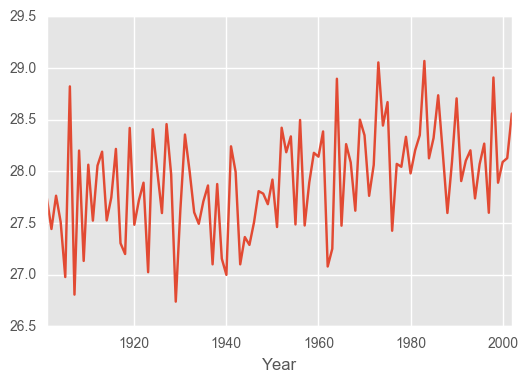

In [66]:
temps_DF.max().plot()

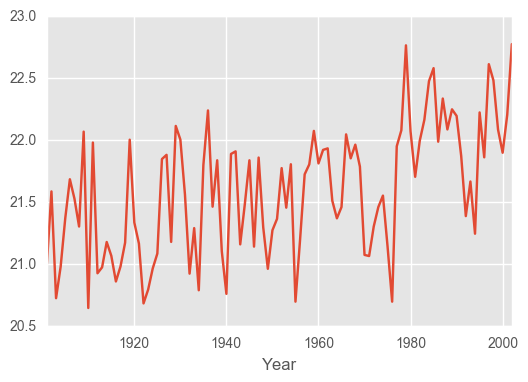

In [67]:
temps_DF.min().plot()

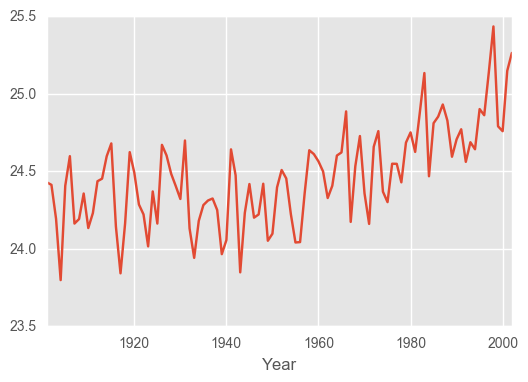

In [68]:
temps_DF.mean().plot()

In [107]:
temps_DF[1960]

Jan    22.714
Feb    23.936
Mar    26.714
Apr    28.142
May    26.971
Jun    25.154
Jul    24.370
Aug    24.636
Sep    23.947
Oct    24.188
Nov    22.183
Dec    21.814
Name: 1960, dtype: float64

In [69]:
# idxmax and idxmin provide the indices corresponding to max and min values in a column
print(temps_DF[1960].idxmax())
print(temps_DF[1960].idxmin())

Apr
Dec


In [70]:
# max and min provide the values
print(np.round(temps_DF[1960].max()))
print(np.round(temps_DF[1960].min()))
print(np.round(temps_DF[1960].mean()))

28.0
22.0
25.0


In [71]:
# define function to display high, low, mean for a year
def high_low_mean(year):
    print("In year", year)
    print(temps_DF[year].idxmin(), "had the lowest temperature of:", np.round(temps_DF[year].min()))
    print(temps_DF[year].idxmax(), "had the highest temperature of:", np.round(temps_DF[year].max()))
    print("The mean temperature was: ", np.round(temps_DF[year].mean()))

In [72]:
high_low_mean(1960)

In year 1960
Dec had the lowest temperature of: 22.0
Apr had the highest temperature of: 28.0
The mean temperature was:  25.0


In [108]:
# calculate gain and attach to new column; gain = (value_in_2002 - value_in_1901)/value_in_1901
temps_DF['gain'] = np.round((temps_DF[2002]-temps_DF[1901])/temps_DF[1901],2)

In [110]:
# verify dataframe
temps_DF.head()

Year,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,...,1994,1995,1996,1997,1998,1999,2000,2001,2002,gain
Jan,23.094,21.588,22.296,20.982,21.740,22.935,21.529,21.974,22.070,22.083,...,22.504,22.372,22.982,22.614,23.530,22.705,23.174,23.196,23.349,0.01
Feb,24.243,22.930,23.969,22.623,24.158,24.680,23.739,23.289,23.860,23.578,...,24.586,24.975,24.345,24.661,25.724,24.466,25.028,26.063,24.130,-0.00
Mar,25.398,26.277,26.552,25.636,26.095,25.505,25.841,25.262,26.425,26.377,...,26.980,26.471,27.077,26.584,27.917,27.490,26.542,27.427,27.284,0.07
Apr,27.740,27.442,27.764,27.510,26.977,28.822,26.807,28.201,27.133,28.064,...,27.738,28.069,27.685,26.850,28.908,27.890,28.090,28.128,28.559,0.03
May,26.328,27.118,26.718,25.878,26.863,28.272,26.550,26.575,26.177,27.479,...,27.685,26.253,28.268,27.599,28.075,25.822,26.859,27.404,27.501,0.04


In [111]:
# create pandas series object with only the gain column 
gain = temps_DF['gain']

In [112]:
# verify object type of gain
type(gain)

pandas.core.series.Series

In [77]:
gain.head()

Jan    0.01
Feb   -0.00
Mar    0.07
Apr    0.03
May    0.04
Name: gain, dtype: float64

In [78]:
# drop missing values and order the series
temp_gain = gain.order(ascending=False)

/Users/osx10/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


In [114]:
temp_gain

Dec    0.08
Mar    0.07
Jul    0.04
May    0.04
Nov    0.03
Oct    0.03
Sep    0.03
Apr    0.03
Aug    0.02
Jun    0.02
Jan    0.01
Feb   -0.00
Name: gain, dtype: float64

In [80]:
temp_gain.head(12)

Dec    0.08
Mar    0.07
Jul    0.04
May    0.04
Nov    0.03
Oct    0.03
Sep    0.03
Apr    0.03
Aug    0.02
Jun    0.02
Jan    0.01
Feb   -0.00
Name: gain, dtype: float64

In [81]:
# delete gain column from temps_DF dataframe since it is now available in temp_gain 
del temps_DF['gain']

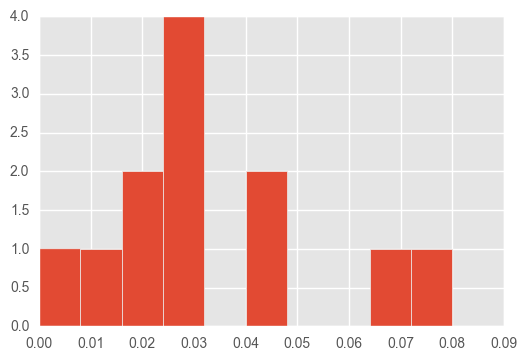

In [82]:
# histogram of gains
temp_gain.hist()

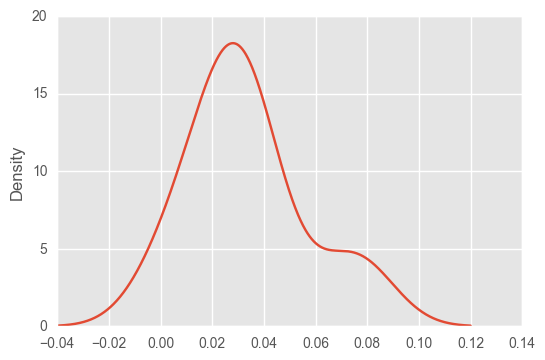

In [83]:
# kde plot of gains
temp_gain.plot(kind='kde')

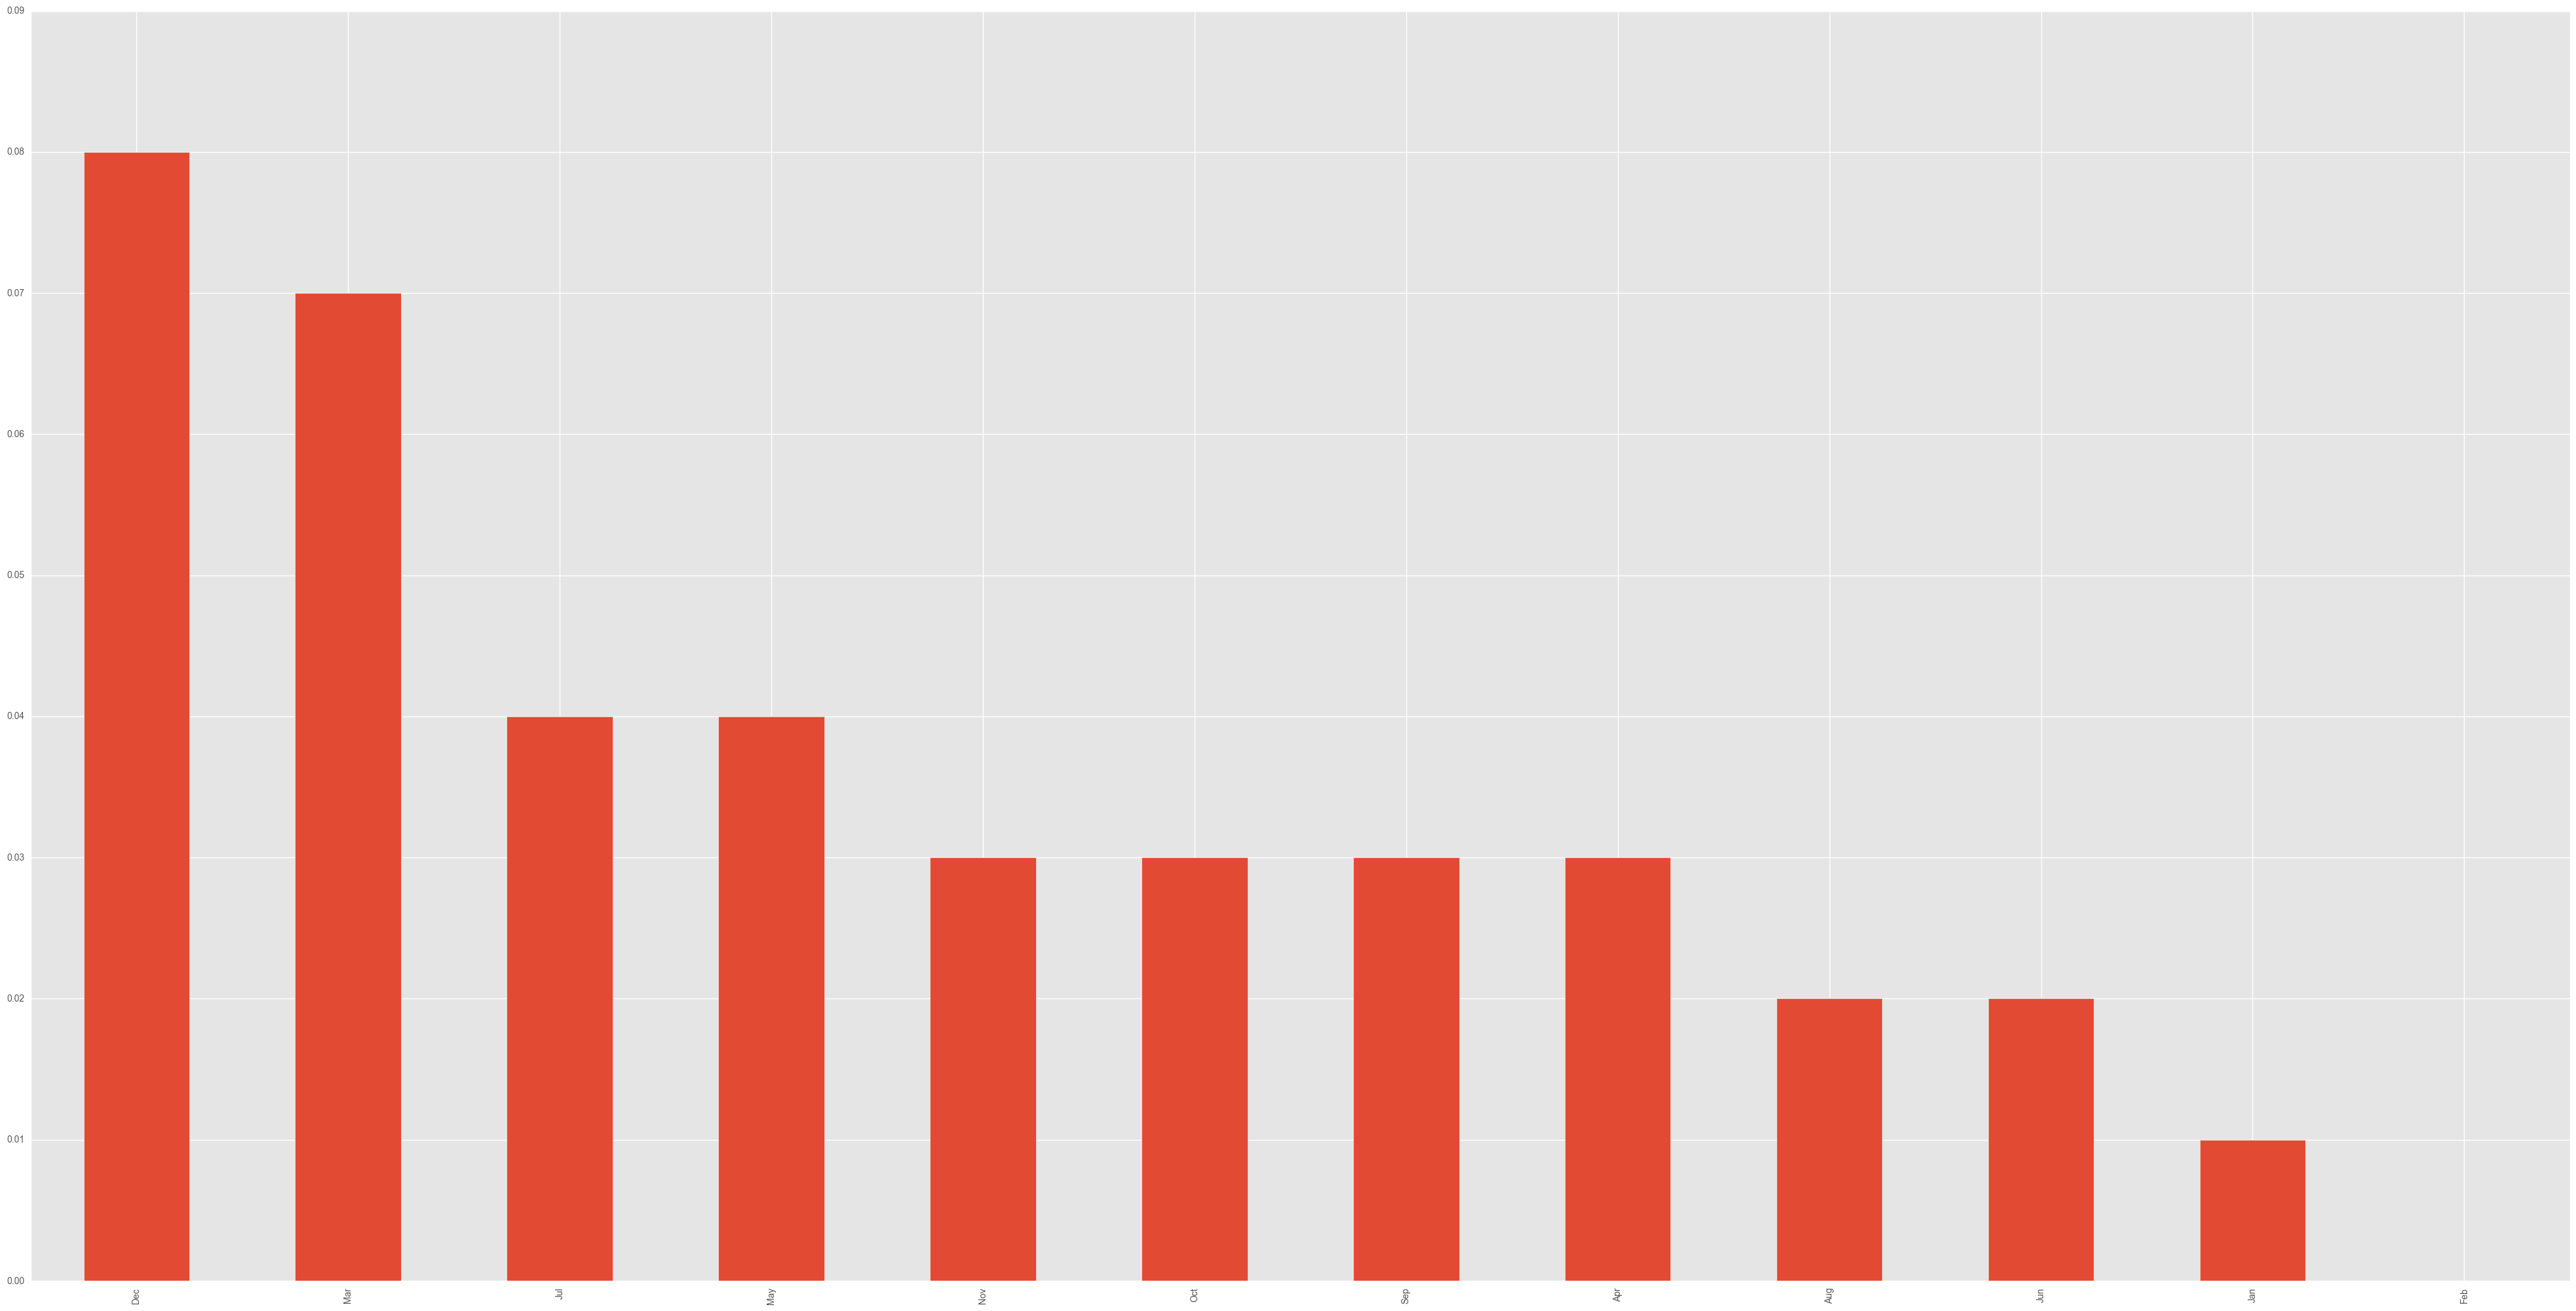

In [84]:
# bar graph of gains and save it to a file
ax = temp_gain.plot(kind='bar', figsize=(50,25));
fig = ax.get_figure()
fig.savefig('gains.png')

### Task 3 - Visualization

**matplotlib**
- Make a histogram for a particular month.
- Compare distributions for 2 months (histograms on subplots).
- Compare two years in the same histogram (use color coding).
- Define a function to compare two months in the same frame.
- Create a box plot for 1 month.
- Create a box plot for 2 months on 1 figure.
- Create a function that compares 2 months via boxplot.

**seaborn**
- Make a KDE plot of one month.
- Make a function that compares the KDE plots of 2 months.
- Compare the histogram and KDE plots of 2 months on the same figure.
- Create a Facetgrid version of the KDE plots. Loop through a months array.
- Create a violin plot for 1 month.
- Create a violin plot for 2 months on 1 figure.
- Create a function that compares 2 months via violin plot.

### matplolib

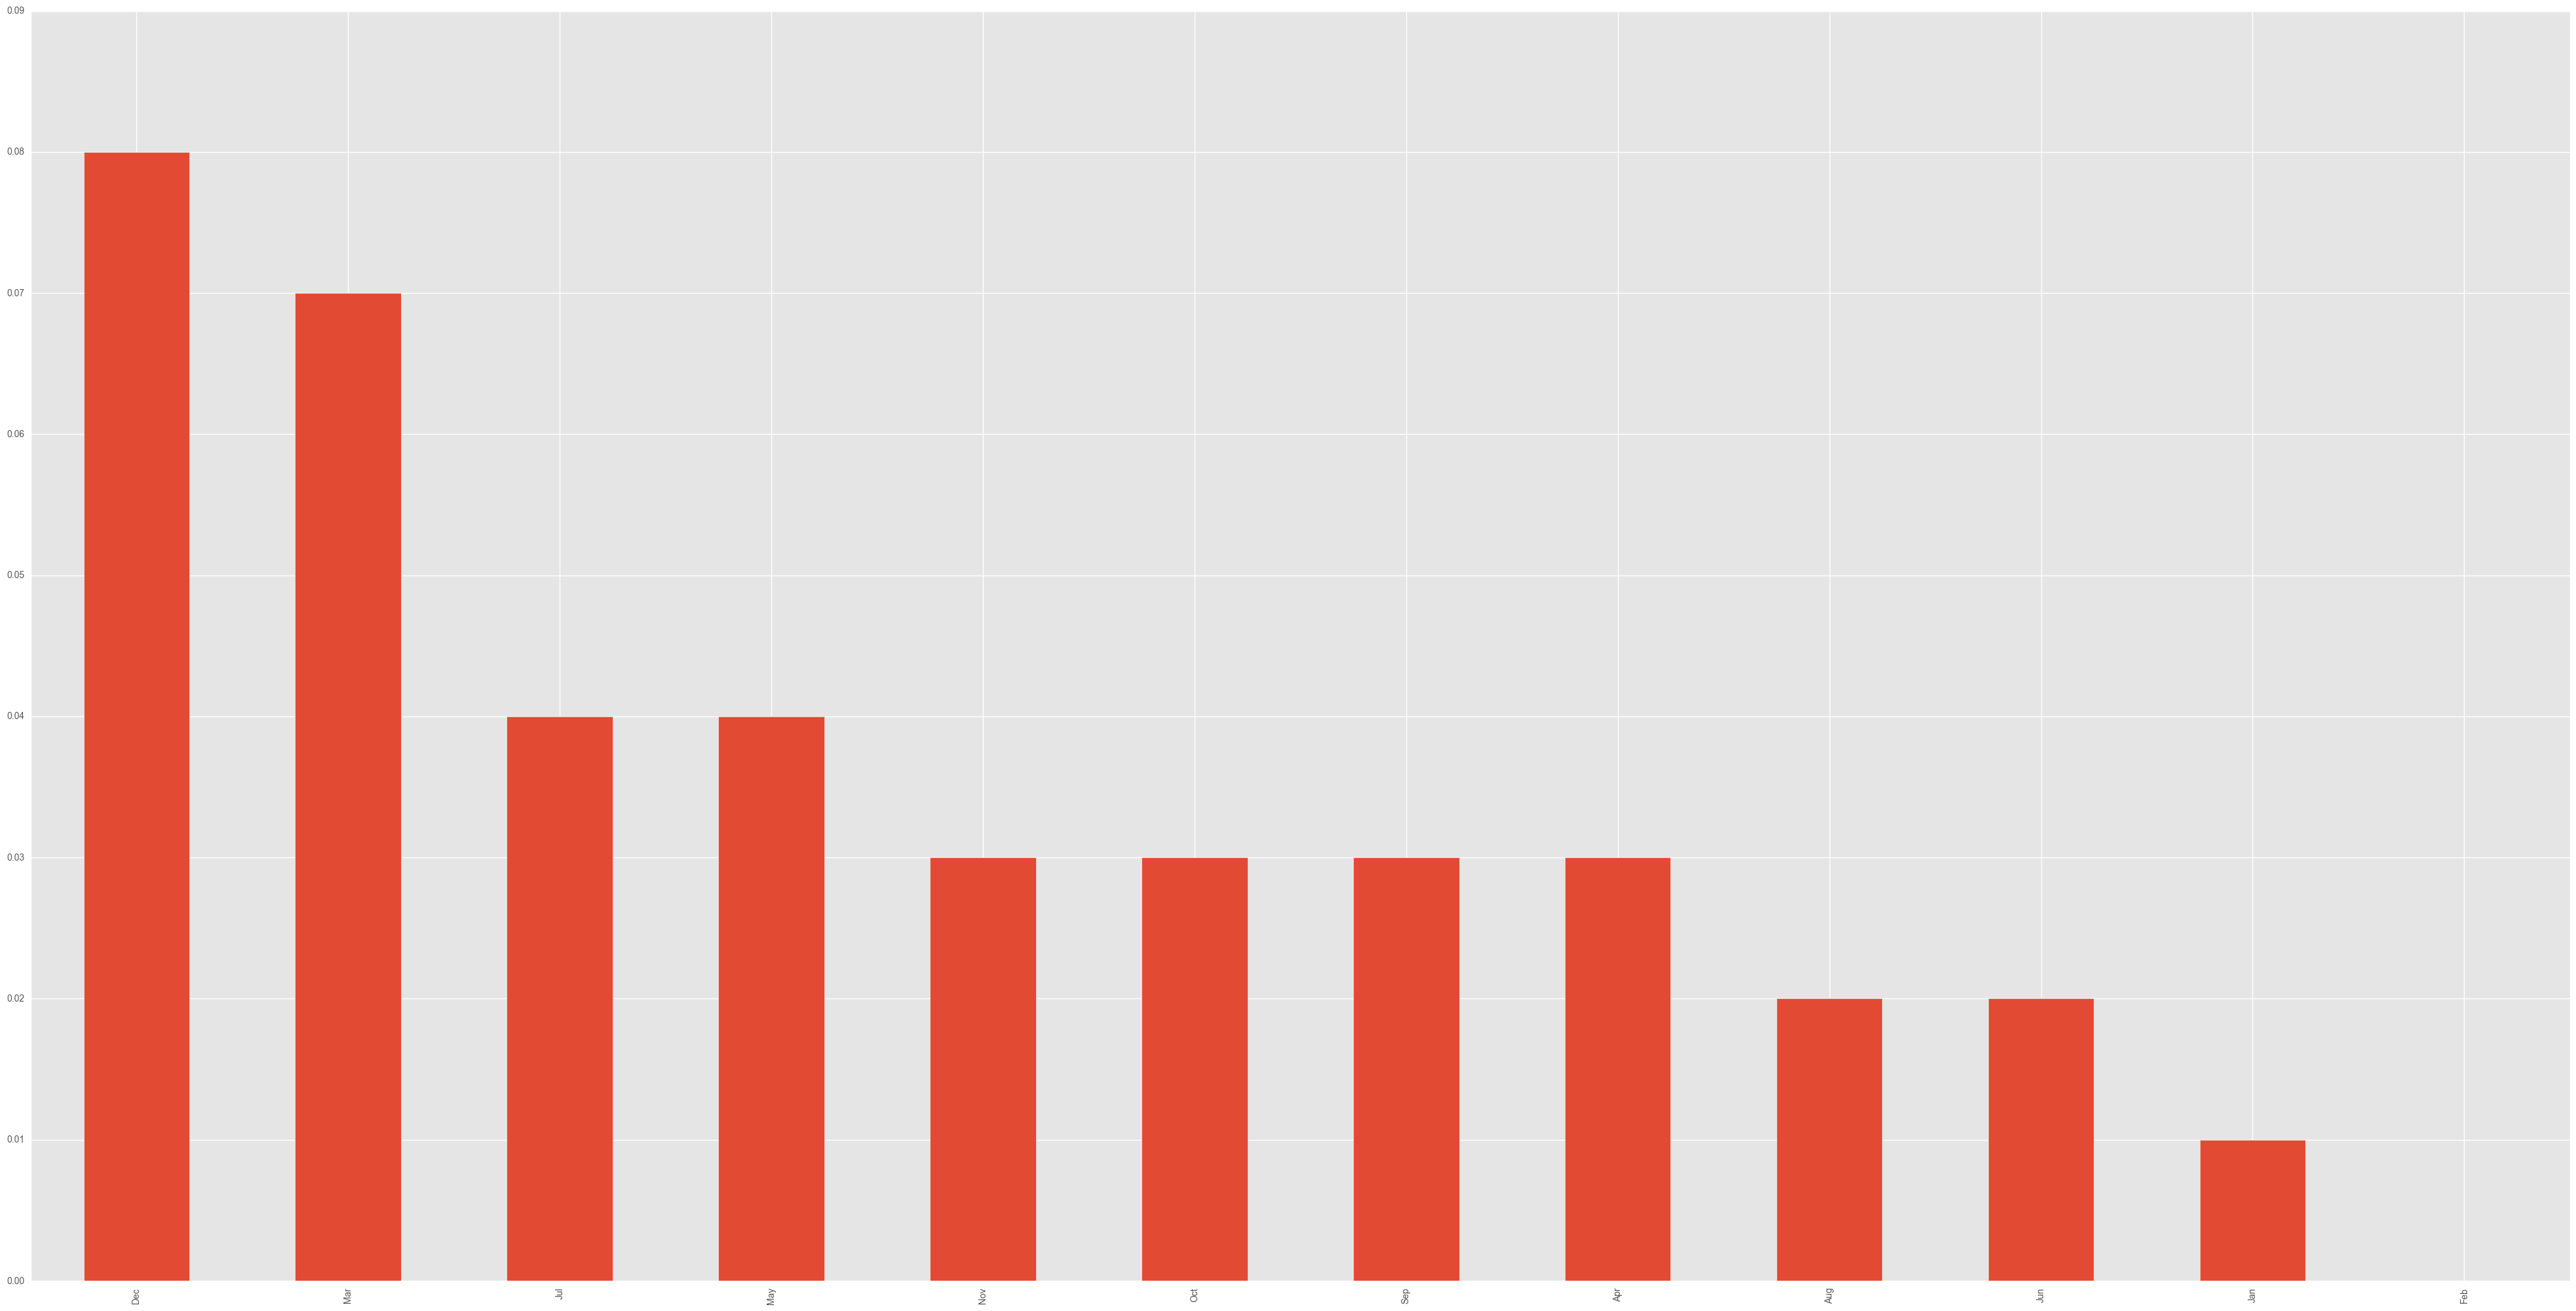

In [85]:
# bar graph of gains and save it to a file
ax = temp_gain.plot(kind='bar', figsize=(50,25));
fig = ax.get_figure()
fig.savefig('gains.png')

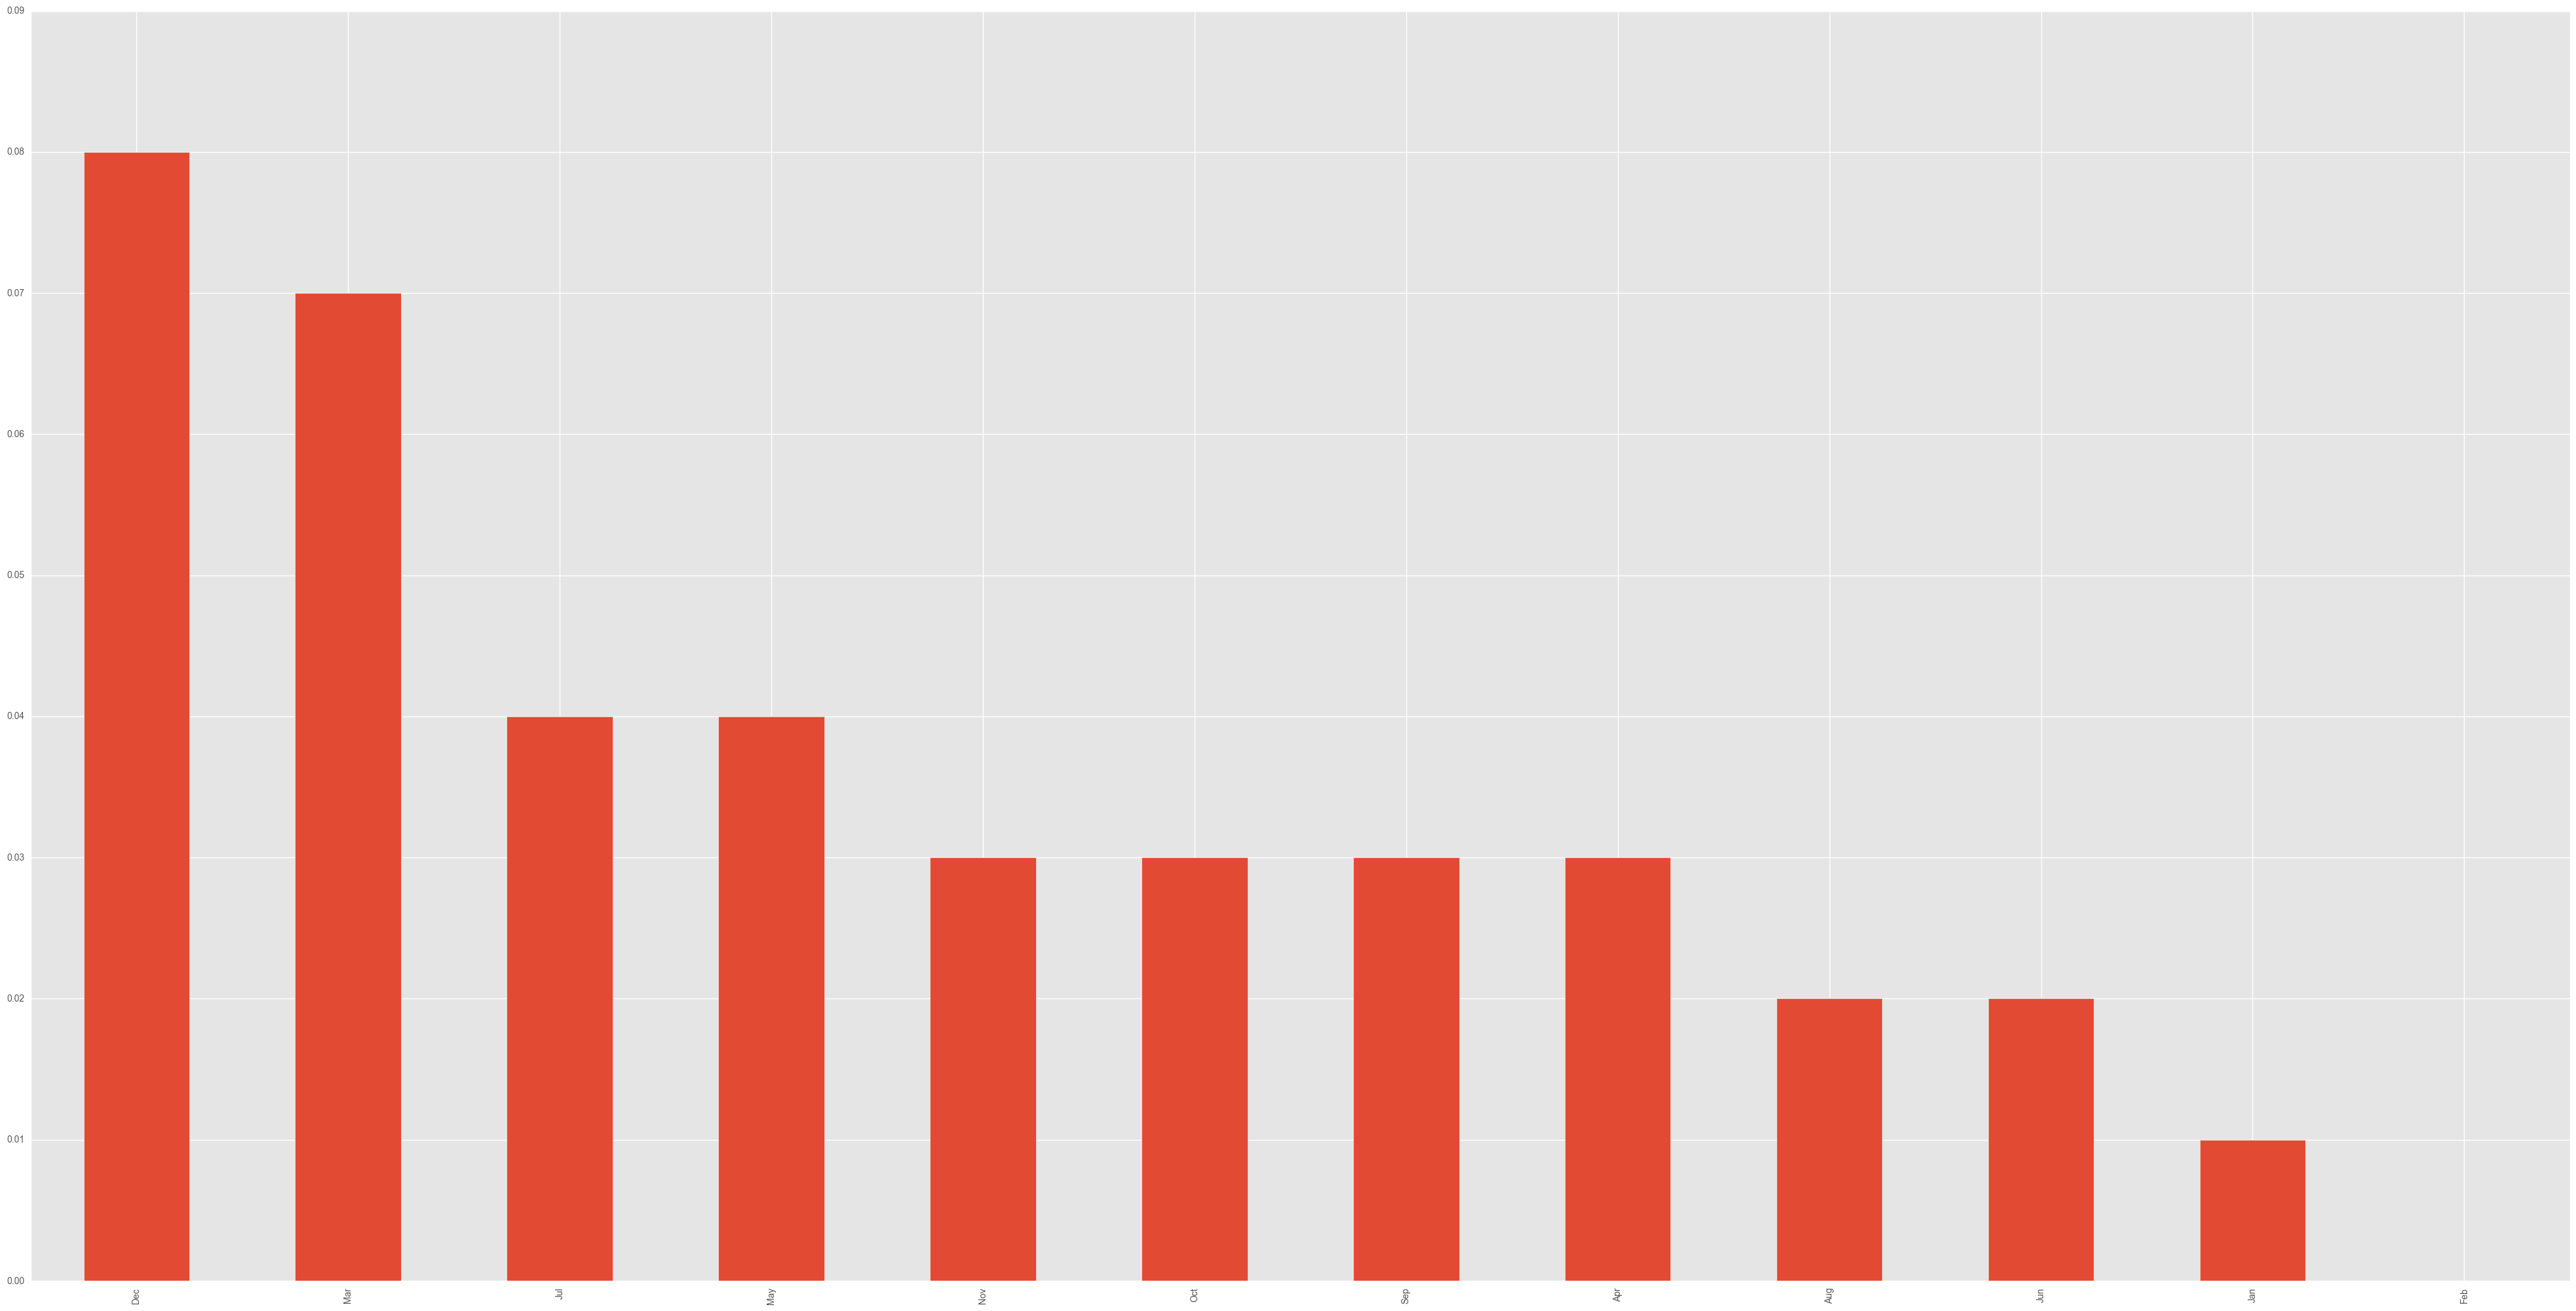

In [86]:
# bar graph of gains and save it to a file
ax = temp_gain.plot(kind='bar', figsize=(50,25));
fig = ax.get_figure()
fig.savefig('gains.png')

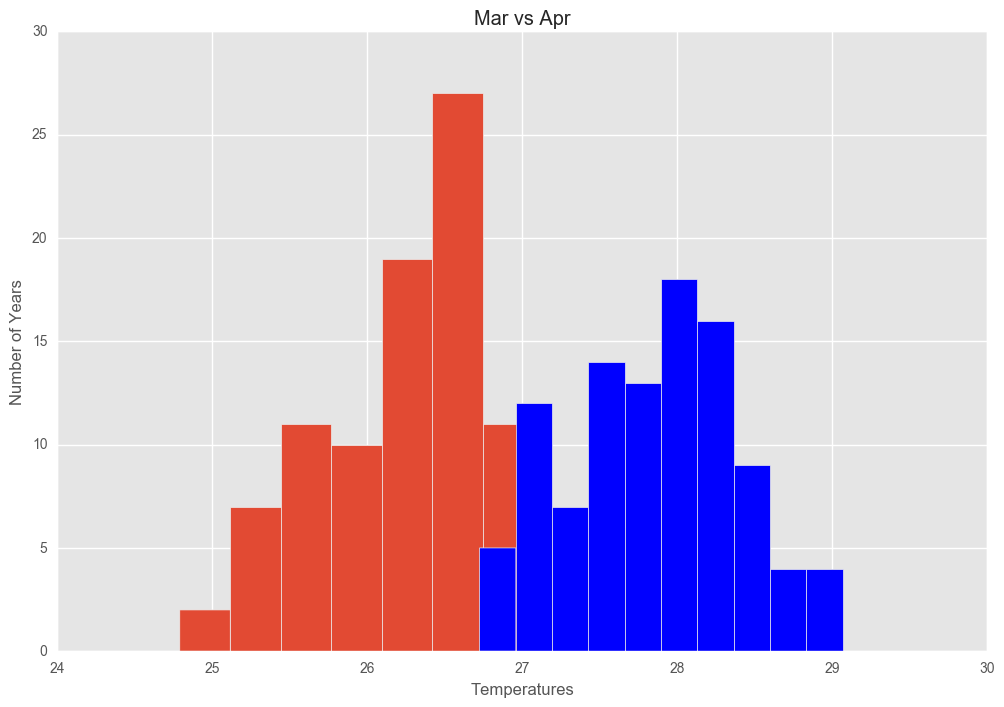

In [87]:
# compare two years in same frame
f, (ax1) = plt.subplots(1,figsize=LARGE_FIGSIZE)
year_mon_temp_DF.hist(column='Mar', ax=ax1);
year_mon_temp_DF.hist(column='Apr', color='blue', ax=ax1);
plt.xlabel('Temperatures')
plt.ylabel('Number of Years')
plt.title("Mar vs Apr")

In [88]:
# define function to compare two months in same frame
def compare_hist(month1,month2):
    f, (ax1) = plt.subplots(1,figsize=LARGE_FIGSIZE)
    year_mon_temp_DF.hist(column=month1,bins=20, ax=ax1);
    year_mon_temp_DF.hist(column=month2,bins=20, color='blue', ax=ax1);
    plt.xlabel('Temperatures')
    plt.ylabel('Number of Years')
    plt.title(month1 + " vs " + month2)

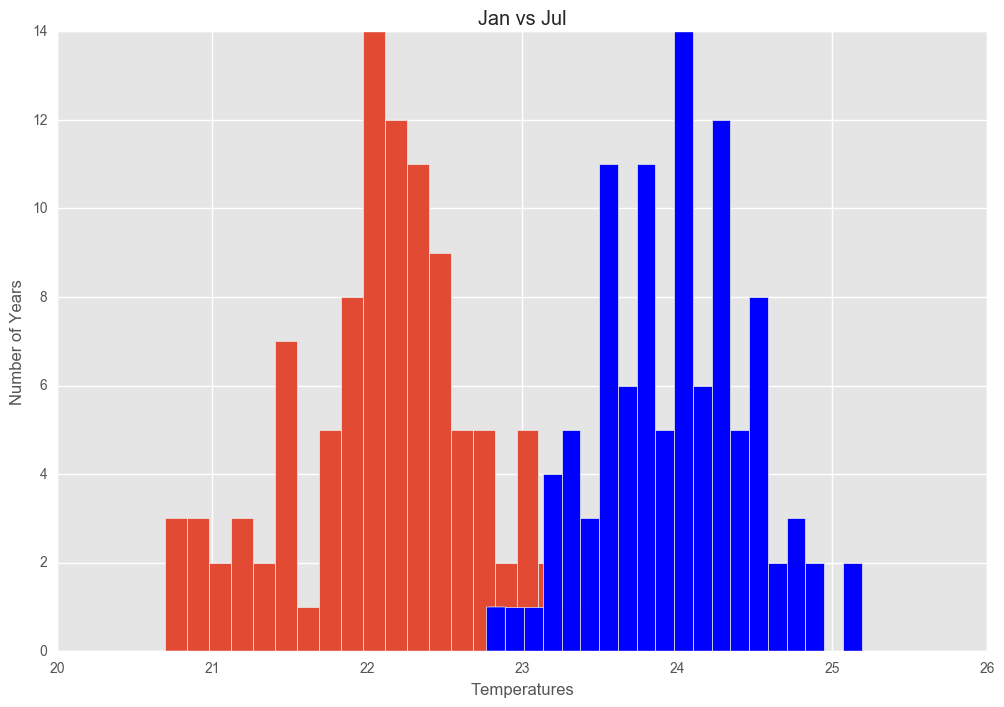

In [89]:
compare_hist('Jan','Jul')

/Users/osx10/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


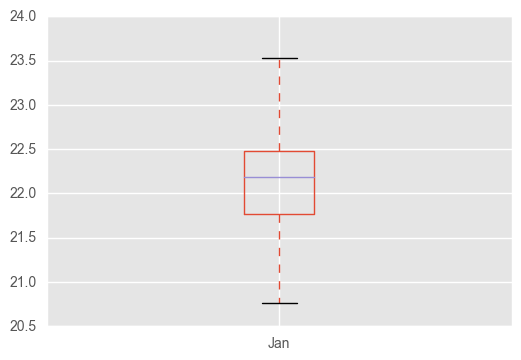

In [90]:
# boxplot using standard pandas and matplotlib
year_mon_temp_DF.boxplot(column='Jan');

/Users/osx10/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


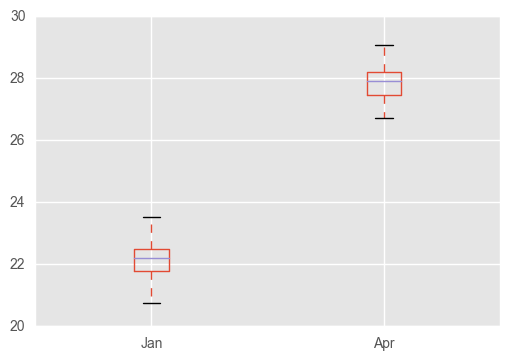

In [91]:
year_mon_temp_DF.boxplot(column=['Jan','Apr']);

In [92]:
def boxplot_compare(month1,month2):
    f, (ax1) = plt.subplots(1, figsize=LARGE_FIGSIZE)
    year_mon_temp_DF.boxplot(column=[month1,month2]);

/Users/osx10/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


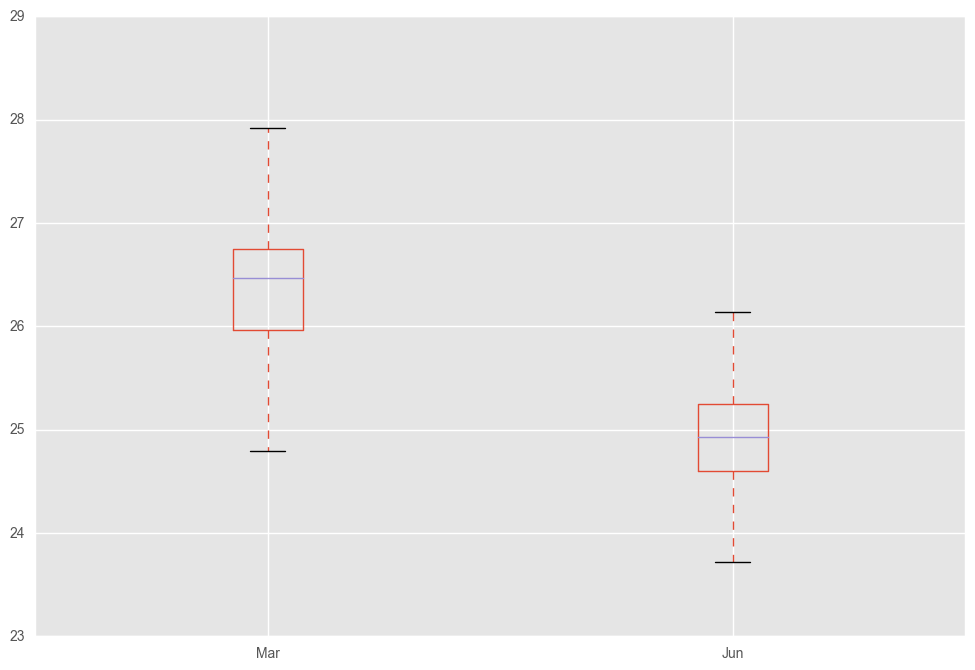

In [93]:
boxplot_compare('Mar', 'Jun')

### seaborn

In [94]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec']

/Users/osx10/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


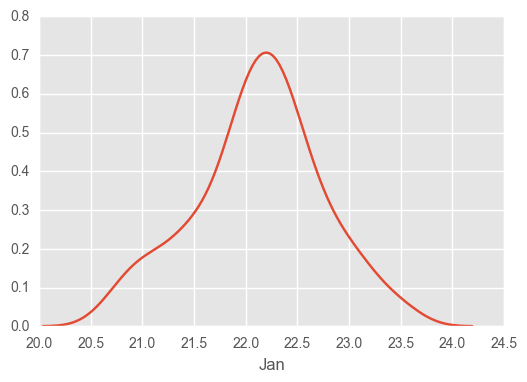

In [95]:
# use seaborn visualization library to plot distributions
# parameters for histogram, kde, and rug can be set true or false

sns.distplot(year_mon_temp_DF['Jan'], hist=False, kde=True, rug=False, bins=25);

In [96]:
def sns_compare(month1,month2):
    f, (ax1) = plt.subplots(1, figsize=LARGE_FIGSIZE)
    sns.distplot(year_mon_temp_DF[month1], hist=False, kde=True, rug=False, bins=25)
    sns.distplot(year_mon_temp_DF[month2], hist=False, kde=True, rug=False, bins=25)

/Users/osx10/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


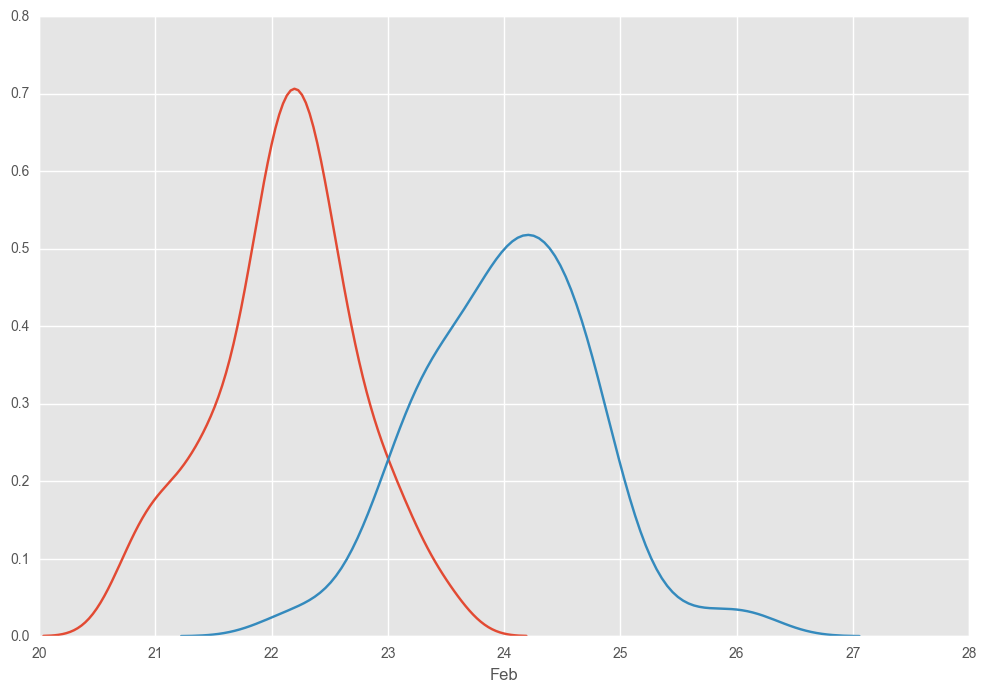

In [97]:
sns_compare('Jan','Feb')

/Users/osx10/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


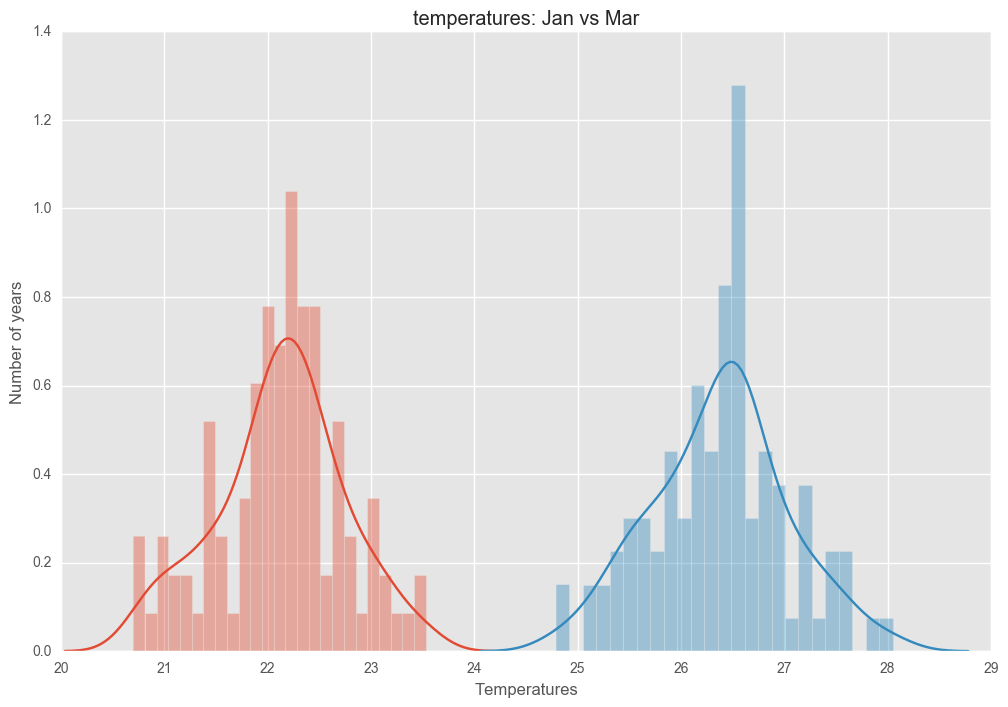

In [98]:
# side by side comparison
f, (ax1) = plt.subplots(1, figsize=LARGE_FIGSIZE)
sns.distplot(year_mon_temp_DF['Jan'],hist=True, kde=True, rug=False, bins=25);
sns.distplot(year_mon_temp_DF['Mar'],hist=True, kde=True, rug=False, bins=25);
plt.xlabel('Temperatures');
plt.ylabel('Number of years');
plt.title('temperatures: Jan vs Mar')

/Users/osx10/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


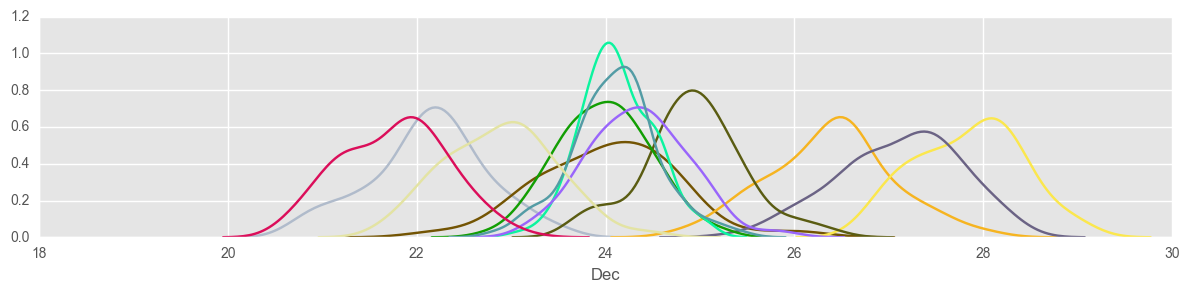

In [99]:
# facetgrid version kdeplot 
fig = sns.FacetGrid(year_mon_temp_DF,aspect=4)
for mon in months:
    fig.map(sns.kdeplot, mon, color=np.random.rand(3,1))

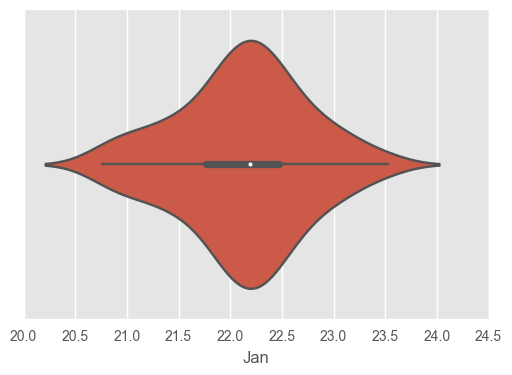

In [100]:
sns.violinplot(year_mon_temp_DF['Jan'])

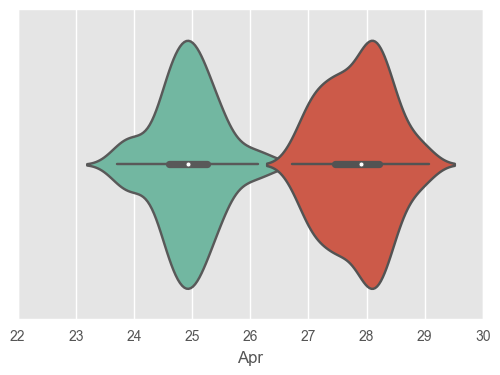

In [101]:
sns.violinplot(year_mon_temp_DF['Jun'], palette="Set2")
sns.violinplot(year_mon_temp_DF['Apr'])

In [102]:
def violin_compare(month1, month2):
    f, (ax1) = plt.subplots(1, figsize=LARGE_FIGSIZE)
    sns.violinplot(year_mon_temp_DF[month1], palette="Set2")
    sns.violinplot(year_mon_temp_DF[month2])

### Task 4 - Insight

- Visually represent the varying temperatures over the entire period.
- Find the coldest and warmest months for May over the entire period.

/Users/osx10/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


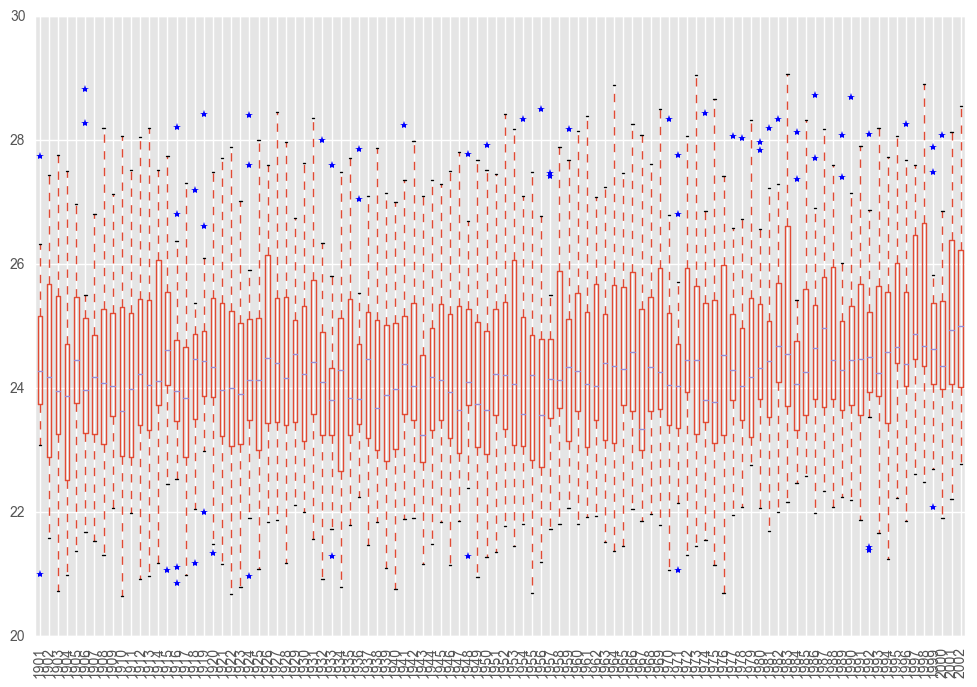

In [103]:
# bird's eye view of temperatures 
fig = plt.figure(figsize=LARGE_FIGSIZE)
temps_DF.boxplot(sym="*");
plt.xticks(rotation='vertical');

In [104]:
year_mon_temp_DF['May'].idxmin()

1918

In [105]:
year_mon_temp_DF['May'].idxmax()

1906